In [2]:
from langgraph.graph import StateGraph, START, END
from typing import Literal, TypedDict

In [3]:
class State(TypedDict):
    a: int
    b: int
    c: int

    eq: str
    dis: float
    res: str

In [4]:
def show_equation(state: State):

    equation: str = f"{state['a']}x2 + {state['b']}x + {state['c']}"

    return {
        'eq': equation
    }

In [ ]:
def calculate_discriminant(state: State):

    a = state['a']
    b = state['b']
    c = state['c']

    dis: float = b**2 - 4*a*c

    return {
        'dis': dis
    }

In [19]:
def real_roots(state: State):
    a = state['a']
    b = state['b']
    c = state['c']
    dis = state['dis']

    root1 = (-b + dis ** 0.5)/(2*a)
    root2 = (-b - dis ** 0.5)/(2*a)

    res = f"The roots are {root1} and {root2}"

    return {
        'res': res
    }


In [20]:
def rptd_roots(state: State):
    a = state['a']
    b = state['b']
    c = state['c']

    root = -b/(2*a)

    res = f"The repeated root is {root}"

    return {
        'res': res
    }

In [21]:
def no_roots(state: State):
    res = "There are no real roots."

    return {
        'res': res
    }

In [23]:
def router(state: State) -> Literal['real_roots', 'no_roots', 'rptd_roots']:
    dis = state['dis']

    if dis > 0:
        return 'real_roots'
    elif dis == 0:
        return 'rptd_roots'
    else:
        return 'no_roots'

In [24]:
# graph
graph = StateGraph(State)

# nodes
graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("rptd_roots", rptd_roots)
graph.add_node("no_roots", no_roots)

# edges
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant", router)

graph.add_edge("real_roots", END)
graph.add_edge("rptd_roots", END)
graph.add_edge("no_roots", END)

graph.add_edge("calculate_discriminant", END)

# compile
workflow = graph.compile()


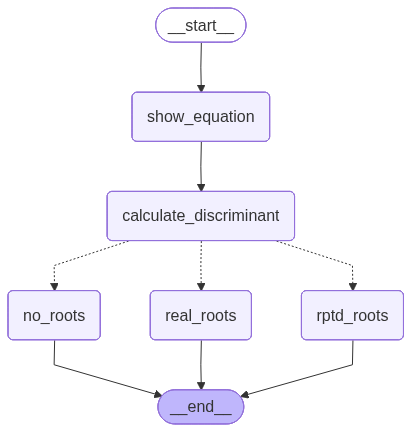

In [25]:
workflow

In [27]:
INITAL_STATE: State = {
    'a': 4,
    'b': -5,
    'c': -4,
}

workflow.invoke(INITAL_STATE)

{'a': 4,
 'b': -5,
 'c': -4,
 'eq': '4x2 + -5x + -4',
 'dis': 89,
 'res': 'The roots are 1.8042476415070754 and -0.5542476415070754'}

In [28]:
INITAL_STATE: State = {
    'a': 4,
    'b': 2,
    'c': 4,
}

workflow.invoke(INITAL_STATE)

{'a': 4,
 'b': 2,
 'c': 4,
 'eq': '4x2 + 2x + 4',
 'dis': -60,
 'res': 'There are no real roots.'}

In [29]:
INITAL_STATE: State = {
    'a': 2,
    'b': 4,
    'c': 2,
}

workflow.invoke(INITAL_STATE)

{'a': 2,
 'b': 4,
 'c': 2,
 'eq': '2x2 + 4x + 2',
 'dis': 0,
 'res': 'The repeated root is -1.0'}